## Github Data Analysis

First Name:  Abhishek 
<br>
Last Name:  Anney
<br>
E-mail: abhishek.anney@gmail.com
<br>

In [1]:
# imports and setup 
from bs4 import BeautifulSoup
import time
import os
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

# where the data is stored
DATA_PATH = "data"

### 1. Scrape Github Repository List using BeautifulSoup


**My Reasoning:**

Scraping is pulling data from a wep pages that are built or markup languages like HTML and XHTML.

For Github website below are the rules to abide by to scrape data:

 1. Github allows us to scrape their website data provided it is public and non-personal without any overuse or abuse of API.
 
 2. The purpose of scraping must be a research or archiving activities. *NO! SPAMMING AT ALL*.
 
 3. Usage of API tokens provided must not exceed limitation set as per github's policy.




### Load the Data

In [2]:
#soup list of search pages.
merge_soup = []
for filename in os.listdir(DATA_PATH):
    if filename.endswith(".html"):
        fullpath = os.path.join(DATA_PATH, filename)
        print('Filename: {}'.format(fullpath)) 
        #Get Page, Make Soup
        soup = BeautifulSoup(open(fullpath,"r",encoding='utf-8'), "html.parser")
        #print(merge_soup) 
        merge_soup.append(soup)

Filename: data\searchPage1.html
Filename: data\searchPage10.html
Filename: data\searchPage2.html
Filename: data\searchPage3.html
Filename: data\searchPage4.html
Filename: data\searchPage5.html
Filename: data\searchPage6.html
Filename: data\searchPage7.html
Filename: data\searchPage8.html
Filename: data\searchPage9.html


In [3]:
type(merge_soup)

list

In [4]:
type(merge_soup[1])

bs4.BeautifulSoup

In [5]:
print(merge_soup[1].prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <link href="https://github.githubassets.com" rel="dns-prefetch"/>
  <link href="https://avatars0.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://avatars1.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://avatars2.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://avatars3.githubusercontent.com" rel="dns-prefetch"/>
  <link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
  <link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/frameworks-a3b8a10d4a9e37a78f033ef4a4f525f5.css" integrity="sha512-pWLt6abkYhNeAHaDrPVG0yXCtIGRuCkwSUqQpsyN6smAIpIt+Iuq2IZKmoH9l3Cy/9ZnjvVrFZnvFFjGiqE3EA==" media="all" rel="stylesheet"/>
  <link crossorigin="anonymous" href="https://github.githubassets.com/assets/github-63c3f4f665859aeca012706b203b8da6.css" integrity="sha512-U1e8XDE

In [6]:
#pulling Repository names, program languages and urls from the soup list of search pages 
repo_names =[]
prog_langs = []
urls = []
for i in range(len(merge_soup)):  
    for repo in merge_soup[i].find_all('li', class_='repo-list-item'):

        #repo name
        title = repo.div.h3.a.text.strip()
        repo_names.append(title)

        #programing languages
        language = repo.find('div',class_='text-gray').text.strip()
        prog_langs.append(language)

        # url 
        url = repo.div.h3.a['href'].strip()
        urls.append(url)


print('Urls',len(urls))
print('programming languages ',len(prog_langs))
print('repo_names',len(repo_names))
#urls

Urls 100
programming languages  100
repo_names 100


In [7]:
links_data = []
for url in urls:
    if url.endswith(".html"):
        #print("Repository url: {}",url) 
        soup = BeautifulSoup(open(url,"r",encoding='utf-8'), "html.parser")
        links_data.append(soup)

In [8]:

#pulling stars,forks, watchers from the data links soup list created above. 
stars = []
watchers = []
forks = []

for i in range(len(links_data)): 
    for value in links_data[i].find('div',class_='experiment-repo-nav').find('ul',class_="pagehead-actions").findAll('li'):  
        if value.a.get_text().strip() == 'Watch':
            watcher = value.find('a',class_='social-count').get_text(strip=True)
            watchers.append(watcher)
        elif value.a.get_text().strip() == 'Star':
            star = value.find('a',class_='social-count').get_text().strip()
            stars.append(star)
        elif value.a.get_text().strip() == 'Fork':
            fork = value.find('a',class_='social-count').get_text(strip=True)
            forks.append(fork)
        else :
            print('None')
        
        
print('forks',len(forks))
print('watchers',len(watchers))
print('stars',len(stars))

forks 100
watchers 100
stars 100


In [9]:
# Pulling number of issues from data links soup list
issues = []
for i in range(len(links_data)): 
    issue =links_data[i].find('div',class_='experiment-repo-nav').nav.find('span',class_='Counter').text
    issues.append(issue)


In [10]:
# Similarly number of contributers , length of the readme files

num_contributers = []
readme_lens =[]
for i in range(len(links_data)):
    for value in links_data[i].find('ul',class_='numbers-summary').findAll('li'):  
        if value.a.svg['class'][1] == 'octicon-organization':
            contributer = value.span.get_text().strip()
            num_contributers.append(contributer)
            
    readme_len =len(links_data[i].find('div',id='readme').text)
    readme_lens.append(readme_len)

#num_contributers
#readme_lens

In [11]:
#formating the repo list
repo_list = []

for index in range(len(repo_names)):
    test = repo_names[index].split('/')[1]
    repo_list.append(test)

In [12]:
#formatting the contributer list 
contri_list = []

for i in range(len(num_contributers)):
              temp= num_contributers[i].replace(",", "")
              contri_list.append(temp)

In [13]:
#Checing the first row of our about the create data frame

In [14]:
repo_list[0]

'freeCodeCamp'

In [15]:
contri_list[0]

'3155'

In [16]:
prog_langs[0]

'JavaScript'

In [17]:
stars[0]

'297,367'

In [18]:
issues[0]

'350'

In [19]:
forks[0]

'20,915'

In [20]:
readme_lens[0]

5703

### Extract Data

Extracted following data: 

1. Name of the repository
+ Number of contributors 
+ Programming language used 
+ Number of stars 
+ Number of issues
+ Number of forks
+ Length of readme file.

In [21]:
import pandas as pd

data = pd.DataFrame({'Repos_name': repo_list,
                       'Num_contributers': contri_list,
                       'Prog_Languages': prog_langs,
                       'Num_stars': stars,
                       'Num_issues': issues,
                       'Num_forks':forks,
                       'Readme_length': readme_lens})
print(data.info())
data.to_csv('project_info.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Repos_name          100 non-null object
Num_contributers    100 non-null object
Prog_Languages      100 non-null object
Num_stars           100 non-null object
Num_issues          100 non-null object
Num_forks           100 non-null object
Readme_length       100 non-null int64
dtypes: int64(1), object(6)
memory usage: 5.5+ KB
None


### 2. Analyzing the repository data

In [22]:

df = pd.read_csv("project_info.csv")
df

,Repos_name,Num_contributers,Prog_Languages,Num_stars,Num_issues,Num_forks,Readme_length
0,freeCodeCamp,3155,JavaScript,"297,367",350,"20,915",5703
1,bootstrap,1060,JavaScript,"130,786",275,"64,021",5484
2,vue,260,JavaScript,"127,842",176,"18,203",2889
3,react,1281,JavaScript,"122,344",394,"22,169",3319
4,tensorflow,1835,C++,"120,562","1,717","72,013",3764
5,free-programming-books,1051,NaN,"117,322",21,"29,507",1776
6,awesome,352,NaN,"101,719",46,"13,435",14582
7,You-Dont-Know-JS,163,NaN,"96,312",132,"18,739",2676
8,oh-my-zsh,1284,Shell,"83,335",359,"16,078",7481
9,d3,123,JavaScript,"82,370",3,"20,381",1539


In [23]:
#all the languages pulled from the github
df['Prog_Languages'].value_counts()

JavaScript    39
Python        11
C++            7
CSS            4
Java           4
TypeScript     4
C              4
Go             3
Ruby           2
Rust           2
Vue            2
C#             1
HTML           1
Shell          1
PHP            1
Dart           1
Name: Prog_Languages, dtype: int64

In [24]:
#before converting requested data columns to integer data types

df.describe()

,Readme_length
count,100.000000
mean,13534.020000
std,24186.722523
min,466.000000
25%,2147.000000
50%,4128.500000
75%,11774.750000
max,158623.000000


### Reformat the data into useful datatypes

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Repos_name          100 non-null object
Num_contributers    100 non-null object
Prog_Languages      87 non-null object
Num_stars           100 non-null object
Num_issues          100 non-null object
Num_forks           100 non-null object
Readme_length       100 non-null int64
dtypes: int64(1), object(6)
memory usage: 5.5+ KB


In [26]:
#number of stars converted to integer data type
df['Num_stars'] = df.Num_stars.str.split(',').str.join('').astype(int)

In [27]:
#issues to integer data type
df['Num_issues'] = df.Num_issues.str.split(',').str.join('').astype(int)

In [28]:
#number of forks to integer type
df['Num_forks'] = df.Num_forks.str.split(',').str.join('').astype(int)

In [29]:
#infinite value check
df[df['Repos_name']=='linux']

,Repos_name,Num_contributers,Prog_Languages,Num_stars,Num_issues,Num_forks,Readme_length
26,linux,∞,C,69339,250,24913,757


In [30]:
# Replacing infinite value with 15000
df.loc[26,'Num_contributers'] = 15000

In [31]:
# Number of contributers with null = False i.e none
df['Num_contributers'].isnull().any()

False

In [32]:
#changing Data type of the contributers column to integer
df['Num_contributers'] = df['Num_contributers'].astype(int)

In [33]:
# Reformated output of the colums Issues, Forks, Stars, and Contributers to be integer data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Repos_name          100 non-null object
Num_contributers    100 non-null int32
Prog_Languages      87 non-null object
Num_stars           100 non-null int32
Num_issues          100 non-null int32
Num_forks           100 non-null int32
Readme_length       100 non-null int64
dtypes: int32(4), int64(1), object(2)
memory usage: 4.0+ KB


### Describe the data

In [34]:
df.describe()

,Num_contributers,Num_stars,Num_issues,Num_forks,Readme_length
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,781.860000,53273.770000,765.600000,12091.810000,13534.020000
std,1633.637257,33218.146273,1218.000332,10648.688346,24186.722523
min,2.000000,32952.000000,0.000000,919.000000,466.000000
25%,139.000000,35509.500000,56.250000,5994.250000,2147.000000
50%,390.500000,44438.500000,325.500000,9273.000000,4128.500000
75%,826.250000,55545.750000,654.500000,15073.500000,11774.750000
max,15000.000000,297367.000000,4928.000000,72013.000000,158623.000000


                  Num_contributers  Num_stars  Num_issues  Num_forks  \
Num_contributers          1.000000   0.201100    0.150712   0.255113   
Num_stars                 0.201100   1.000000   -0.060817   0.520185   
Num_issues                0.150712  -0.060817    1.000000  -0.034799   
Num_forks                 0.255113   0.520185   -0.034799   1.000000   
Readme_length            -0.067756  -0.041444   -0.148787  -0.112396   

                  Readme_length  
Num_contributers      -0.067756  
Num_stars             -0.041444  
Num_issues            -0.148787  
Num_forks             -0.112396  
Readme_length          1.000000  


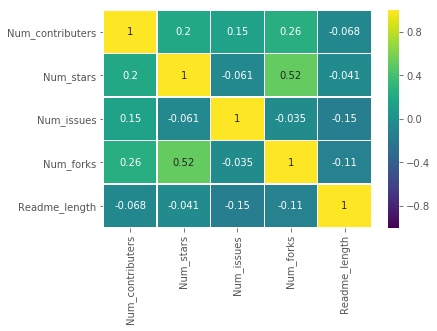

In [35]:

import seaborn as sns
print(df.corr())
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0.2,vmax=1,vmin=-1,mask=False,cmap='viridis')

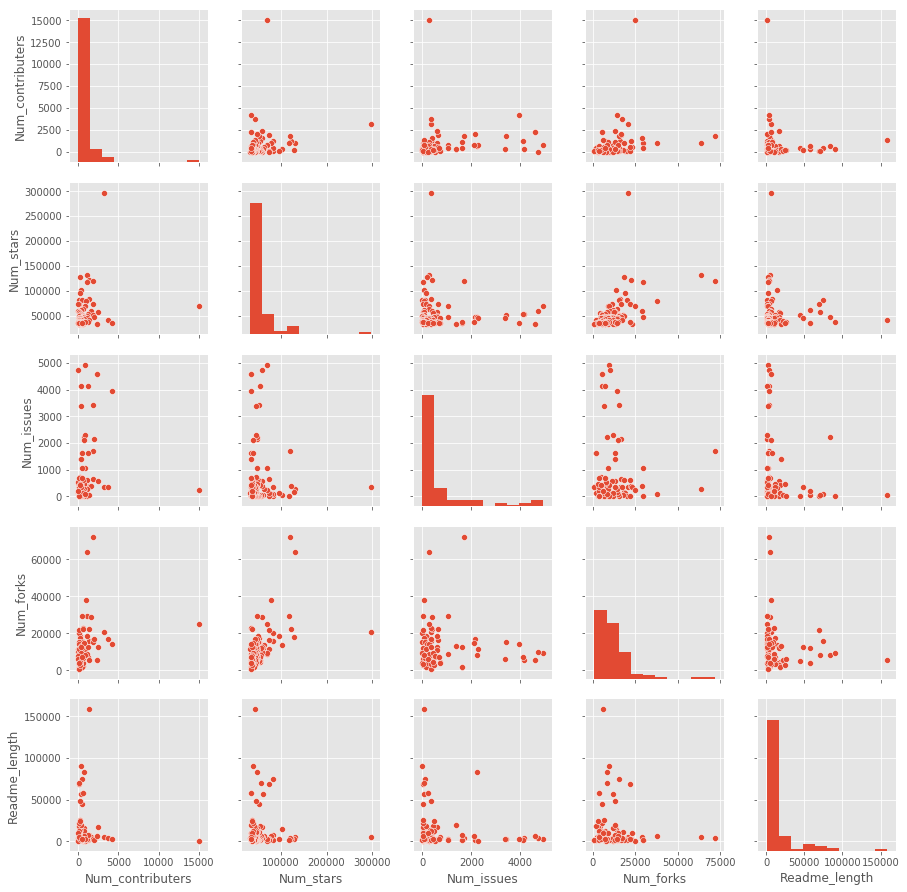

In [36]:
sns.pairplot(df)

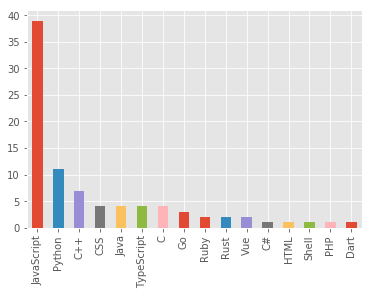

In [37]:
# for explaination purpose plotted the below.As this could have got clumsy if incorporated in the scatter plot matrix otherwise pair plot .
df["Prog_Languages"].value_counts().plot(kind="bar")
#javascript language constitutes highest volume of repositories 

**My Interpretation:** 

1. Both the Heatmap and scatterplot matrix depict strong positive correlation between Stars and Folks i.e 0.52

2. There is no other insight useful for our analysis with the dataset.

3. For understanding, as I could not applu hue to the scatter matrix plot (not to make it clumsy) I plotted a different Histogram to identify the volume of repositories by language. Javascript wins here with a large margin.


###  Linear regression

1. Use linear regression to try to predict the number of Stars based on Forks, Contributors, Issues, and Readme Length. Explain why this is not a very good model by discussing the R-squared , F-statistic p-value, and coefficient  p-values. 
+ Develop another model which is better. Explain why it is better and interpret your results. 

In [38]:

# imports and setup

import scipy as sc
from scipy.stats import norm

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


In [39]:
df.columns

Index(['Repos_name', 'Num_contributers', 'Prog_Languages', 'Num_stars',
       'Num_issues', 'Num_forks', 'Readme_length'],
      dtype='object')

In [40]:
stars_ols = sm.ols(formula="Num_stars ~ Num_forks + Num_contributers + Num_issues + Readme_length", data=df).fit()
stars_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Num_stars   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     9.180
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.58e-06
Time:                        23:29:57   Log-Likelihood:                -1166.1
No. Observations:                 100   AIC:                             2342.
Df Residuals:                      95   BIC:                             2355.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.406e+04   5322.988      6.398      0.000    2.35e+04    4.46e+04
Num_forks            1.5551      0.284      5.482      0.000       0.992       2.118
Num_contributers     1.6858      1.858      0.907      0.367      -2.003       5.375
Num_issues          -1.4770      2.438     -0.606      0.546      -6.317       3.363
Readme_length        0.0167      0.122      0.137      0.891      -0.225       0.259
==============================================================================
Omnibus:                      150.442   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7022.787
Skew:                           5.403   Prob(JB):                         0.00
Kurtosis:                      42.607   Cond. No.                     5.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
stars_forks_ols = sm.ols(formula="Num_stars ~ Num_forks", data=df).fit()
stars_forks_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Num_stars   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     36.36
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           2.91e-08
Time:                        23:30:02   Log-Likelihood:                -1166.7
No. Observations:                 100   AIC:                             2337.
Df Residuals:                      98   BIC:                             2343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.365e+04   4326.718      7.778      0.000    2.51e+04    4.22e+04
Num_forks      1.6227      0.269      6.030      0.000       1.089       2.157
==============================================================================
Omnibus:                      153.657   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7709.102
Skew:                           5.574   Prob(JB):                         0.00
Kurtosis:                      44.544   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**My interpretation:** 

Model 1 : stars_ols
Model created with dependent varaiable as Stars with all there predictors applied, the model does not perform well.

Reasons being :
1. Contributers issues readme length have a high positve p-value, which means the coiffients of these predictors are not significant at all
2. R-squared is appx. 27.9 % i.e only 27.9% of the variation of the stars variable (Target) against predictors (issues, contributors, readme length, forks) is explained by the model. More importantly the p-values for the predictors (issues, contributors, readme length) are evaluatiing the coefficients as insignificant.
3. F-statistic is a ratio of two quantities that are expected to be roughly equal under the null hypothesis In the case of first model this is just 9.18

Model 2 :  stars_forks_ols

Model 2 is a good model for the following reasons :
1. Only one independent variable i.e forks is used (validated the corr from the about scatter matrix plot).
2. Both are highly correlated
3. P-value for the forks variable is 0 . The coefficient is significant and confident to be considered.
4. F-static value is high appx. 36
5. R-squared is appx. 27.1 % but produces signicant coifficient of the forks variable over the stars variable(Target).
